Цепляем регионы

In [1]:
import pandas as pd
import requests
import geopandas as gpd

CRS = 4326
URL = 'http://10.32.1.107:5300/'

def get_country_regions(country_id : int) -> gpd.GeoDataFrame:
    res = requests.get(URL + 'api/v1/all_territories', {
        'parent_id':country_id
    })
    return gpd.GeoDataFrame.from_features(res.json()['features'], crs=CRS).set_index('territory_id', drop=True)

def get_countries_without_geometry() -> pd.DataFrame:
    res = requests.get(URL + 'api/v1/all_territories_without_geometry')
    return pd.DataFrame(res.json()).set_index('territory_id', drop=True)

def get_regions():
    countries = get_countries_without_geometry()
    countries_ids = countries.index
    countries_regions = [get_country_regions(country_id) for country_id in countries_ids]
    return pd.concat(countries_regions)

regions = get_regions()

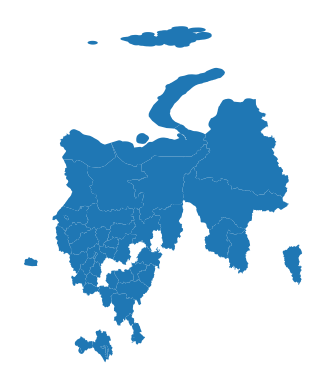

In [2]:
regions.plot().set_axis_off()

Пробуем генерировать

In [7]:
from townsnet.potential.grid_generator import GridGenerator

gg = GridGenerator()
print(gg.cell_size)

3612.9052100000004


/home/vasilstar/townsnet/.venv/lib/python3.10/site-packages/geopandas/plotting.py:684: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=figsize)


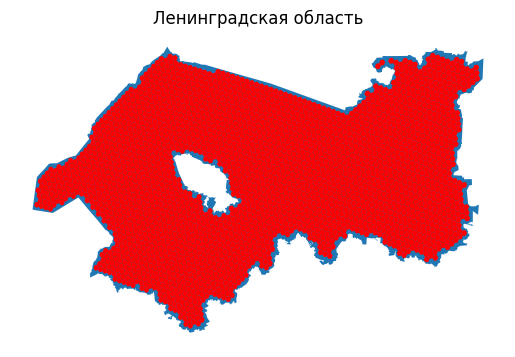

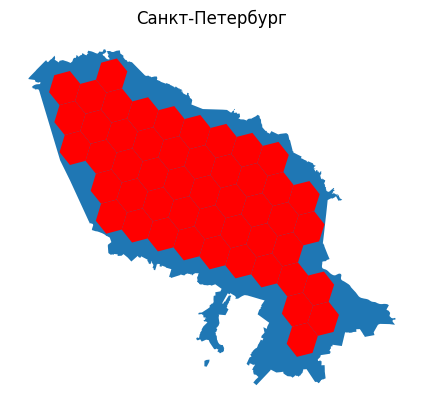

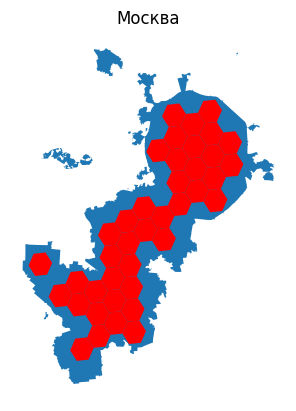

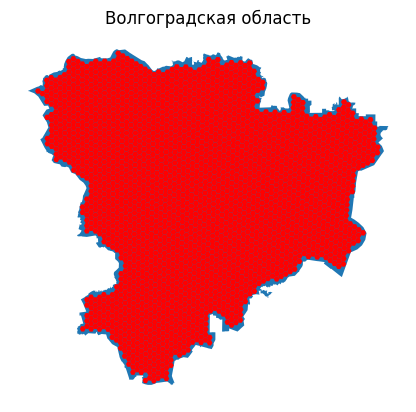

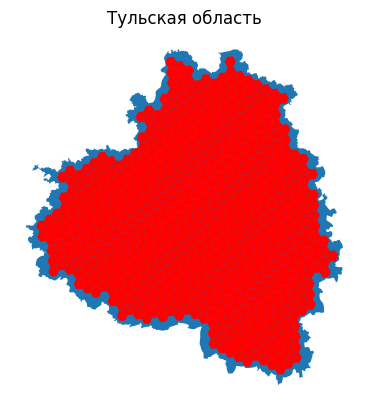

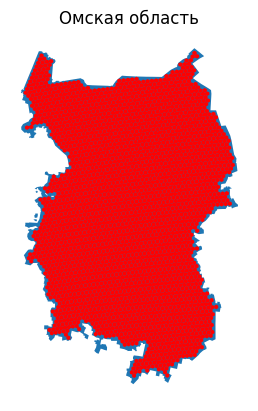

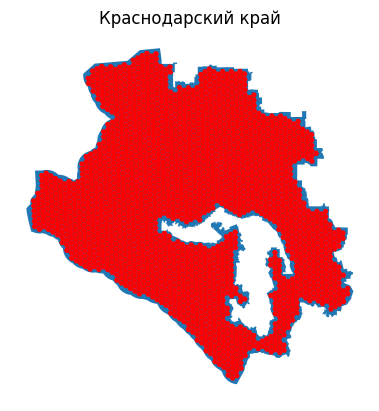

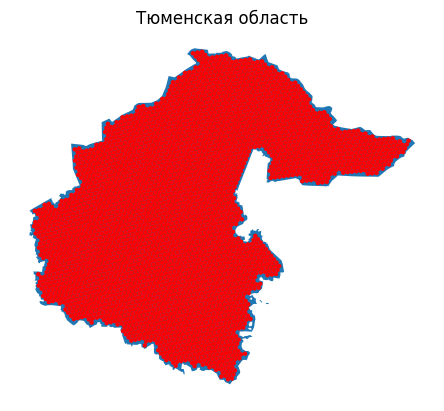

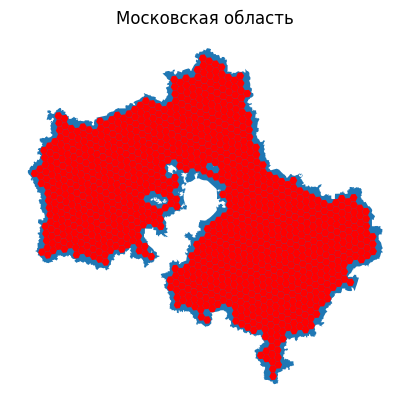

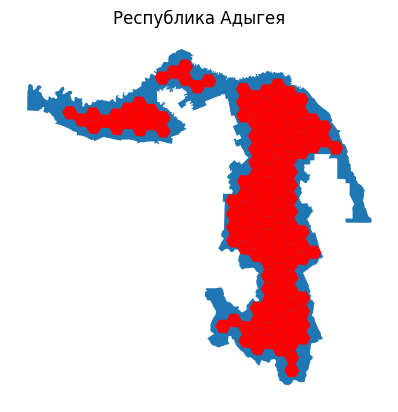

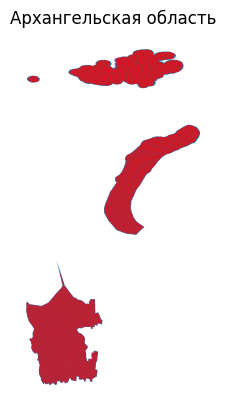

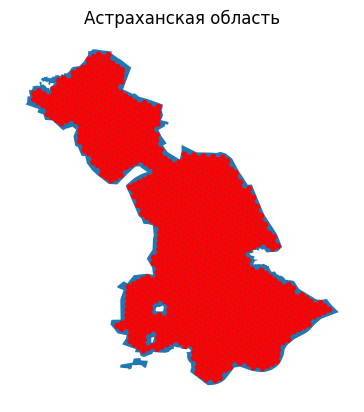

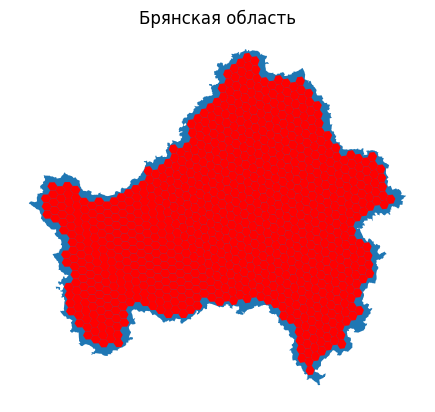

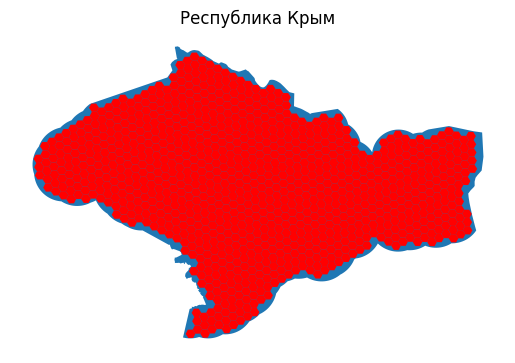

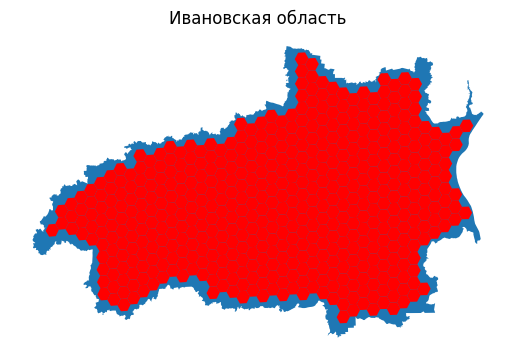

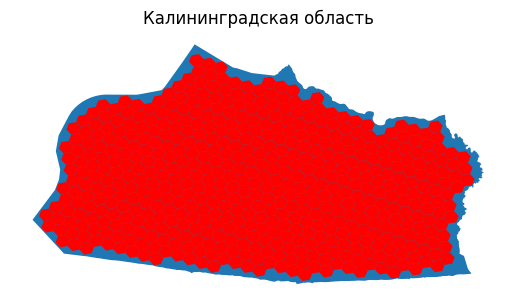

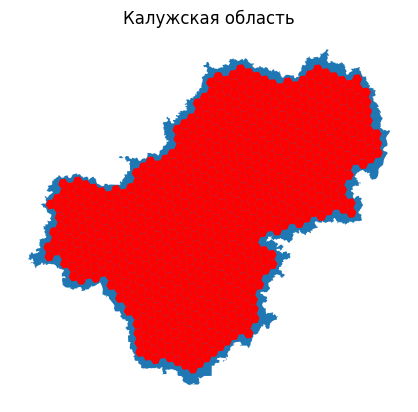

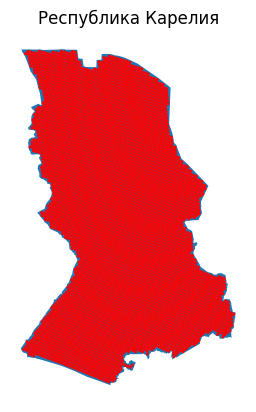

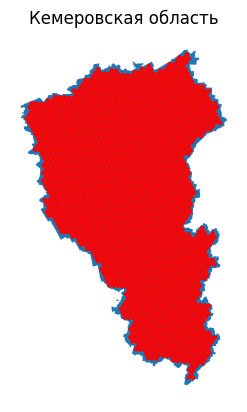

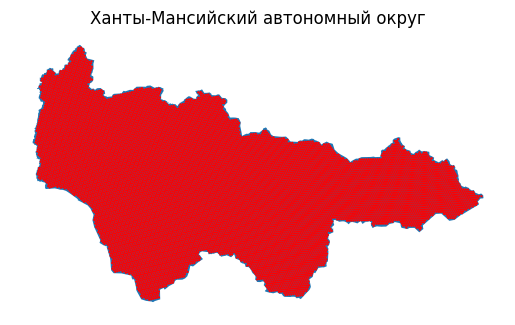

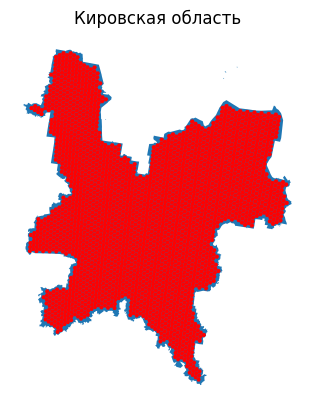

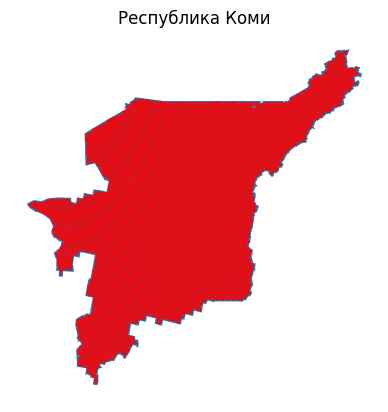

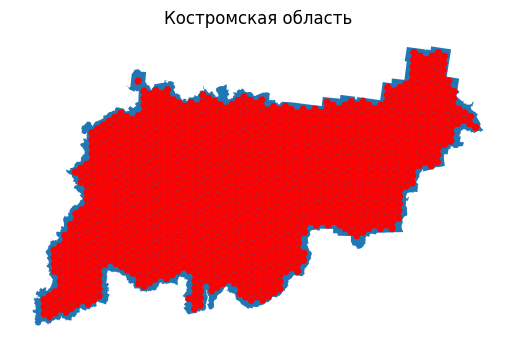

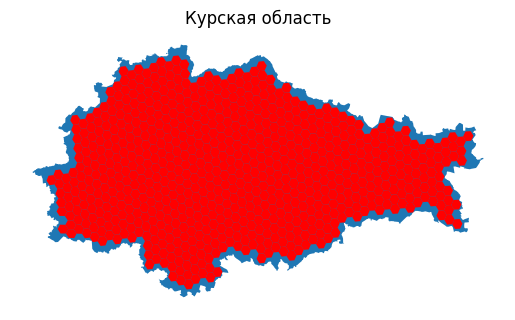

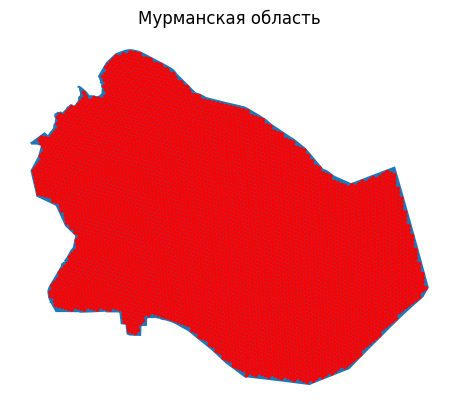

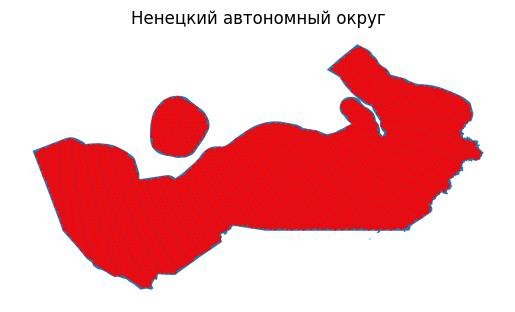

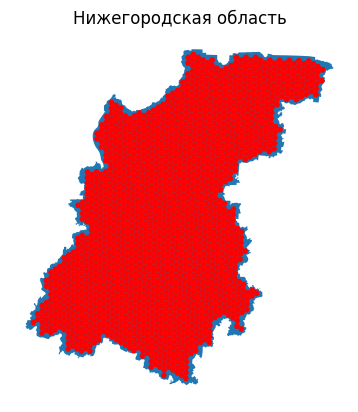

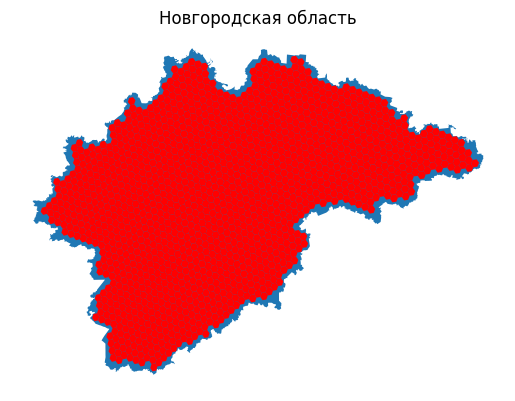

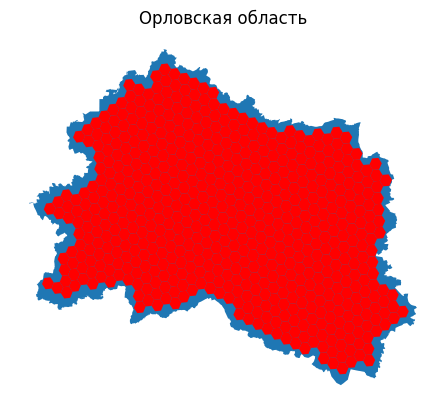

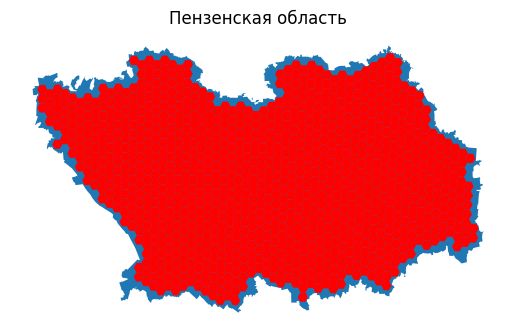

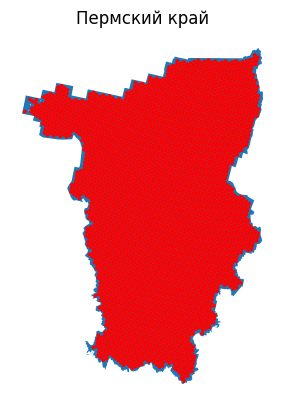

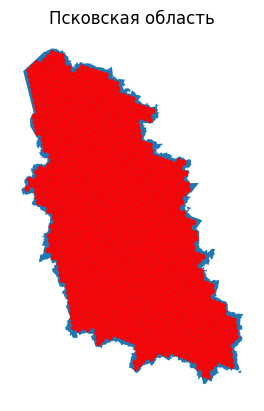

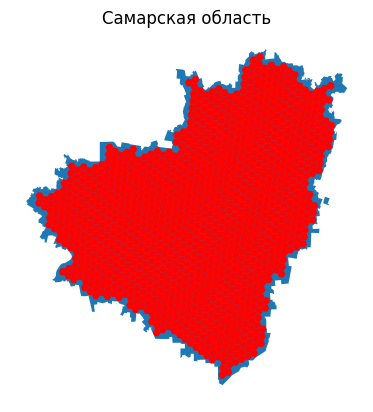

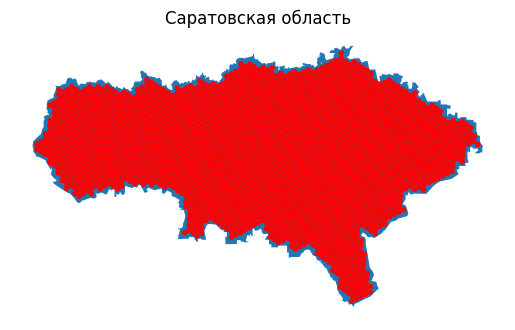

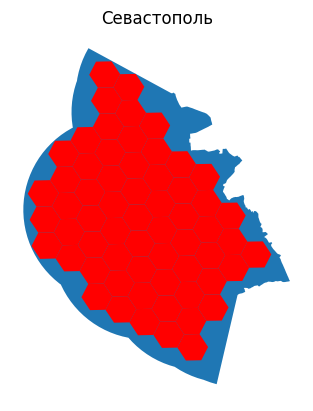

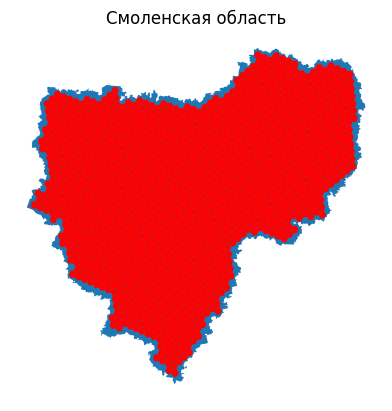

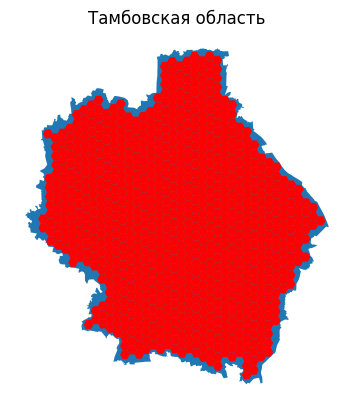

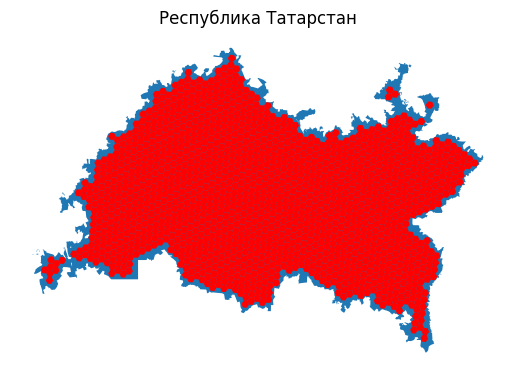

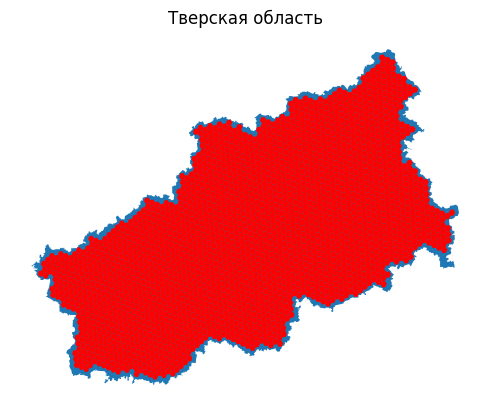

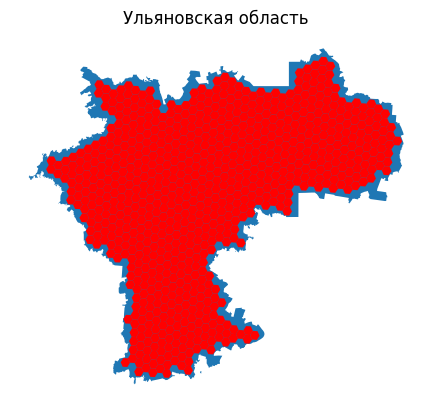

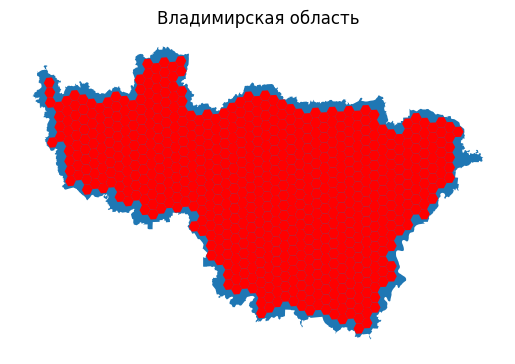

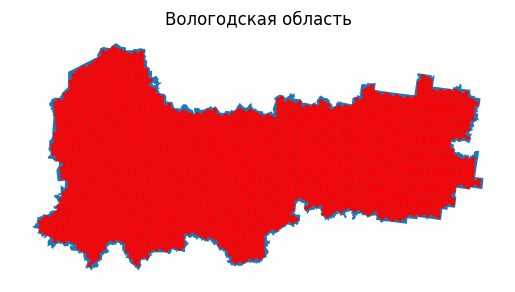

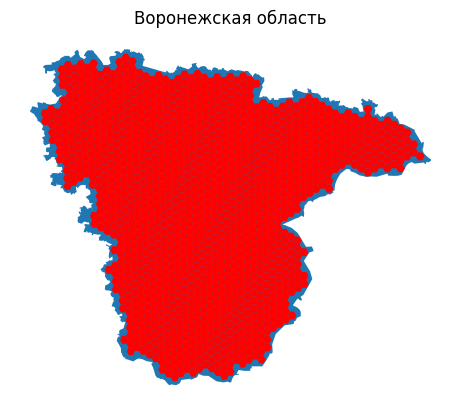

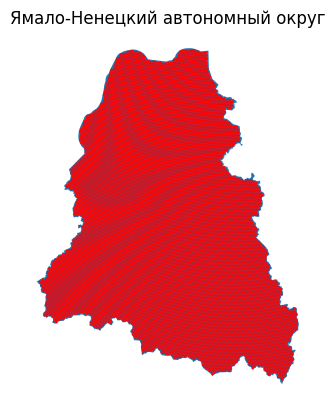

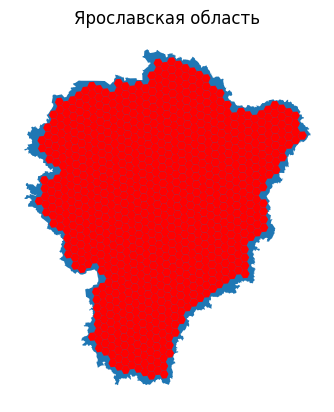

In [5]:
for region_id in regions.index:
  name = regions.loc[region_id, 'name']
  gdf = regions[regions.index == region_id]
  
  ax = gdf.plot()
  ax.set_title(name)

  grid = gg.run(gdf)
  grid.plot(ax=ax, color='red')
  ax.set_axis_off()